In [210]:
import pygmt
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':30})

In [211]:
# inpath = join('~/data/', "geo_stations.csv")
# stadf = pd.read_csv(inpath, index_col=0)

# inpath = join(hydro_dir, "boreholes.csv")
# inpath = join('~/data/', "boreholes.csv")
bordf = pd.read_csv('~/data/boreholes.csv', index_col=0)
bordf

# 0674449 E / 2531390 N
# 22.881330N 58.700590E 


,name,longitude,latitude,east,north
0,BA1A,58.700583,22.881217,24.934722,-59.136398
1,BA1B,58.700085,22.882312,-26.165856,62.126489


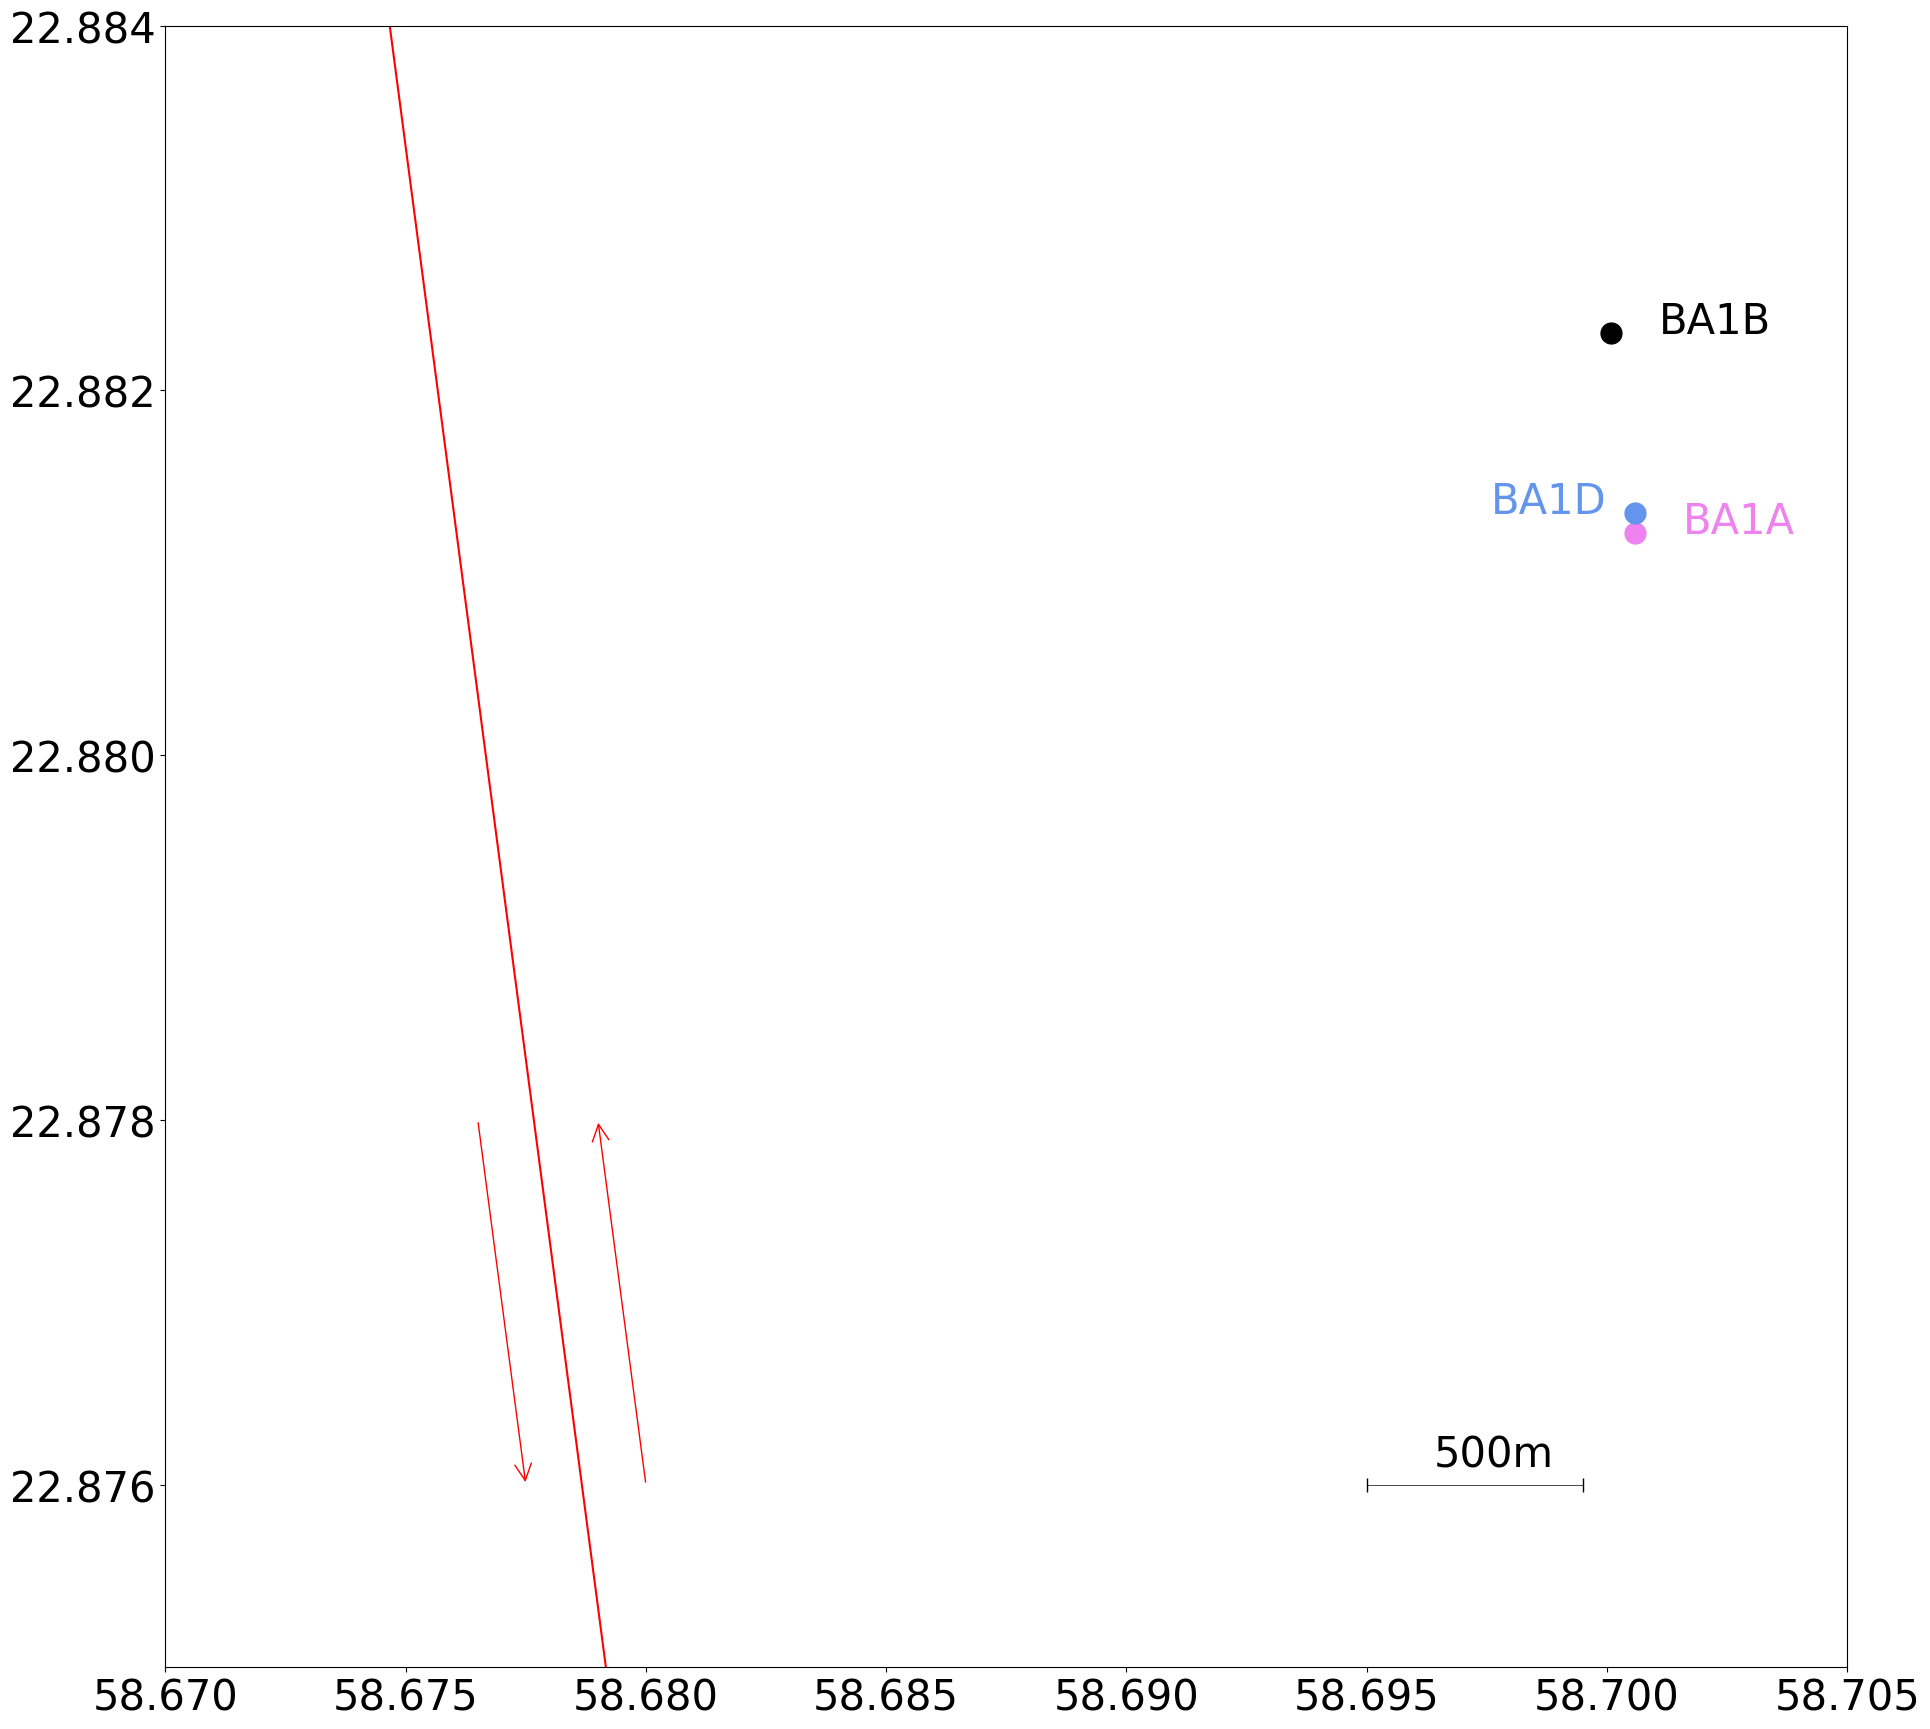

In [213]:
fig, ax = plt.subplots(figsize=(20, 18))

ax.plot(bordf['longitude'][0], bordf['latitude'][0], marker='o', markersize=15, linestyle='', color='violet')
ax.plot(bordf['longitude'][1], bordf['latitude'][1], marker='o', markersize=15, linestyle='', color='black')
ax.plot(58.700590, 22.88133, marker='o', markersize=15, color='cornflowerblue')

ax.text(s='BA1B', x=bordf['longitude'][1]+0.001, y=bordf['latitude'][1])
ax.text(s='BA1A', x=bordf['longitude'][0]+0.001, y=bordf['latitude'][0], color='violet')
ax.text(s='BA1D', x=58.700590-0.003, y=22.88133, color='cornflowerblue')

### FAULT ###
fault_start = (58 + 38/60, 22 + 58/60)  # (lon, lat) for (58°38', 22°58')
fault_end = (58 + 42/60, 22 + 50/60)      # (lon, lat) for (58°42', 22°50')
flons = [fault_start[0], fault_end[0]]
flats = [fault_start[1], fault_end[1]]

ax.plot(flons, flats, color='red')
x_tail = 58.68
y_tail = 22.876
x_head = 58.679
y_head = 22.878

ax.annotate('', 
              xy =(x_head, y_head),
              xytext =(x_tail, y_tail), 
              arrowprops = dict(arrowstyle="->", color='red')
           ,)

x_tail = 58.6775
y_tail = 22.876
x_head = 58.6765
y_head = 22.878
ax.annotate('', 
              xy =(x_head, y_head),
              xytext =(x_tail, y_tail), 
              arrowprops = dict(arrowstyle="<-", color='red')
           ,)

ax.set_ylim(22.875, 22.884)
ax.set_xlim(58.67, 58.705)

ax.plot((58.695, (58.695+5*100/(111113))), (22.876, 22.876), marker='|', markersize=10, linewidth=0.5, color='black')
ax.text(s='500m', x=58.6964, y= 22.8761)
fig.tight_layout()

In [152]:
100/(111113)

0.0008999847002600956

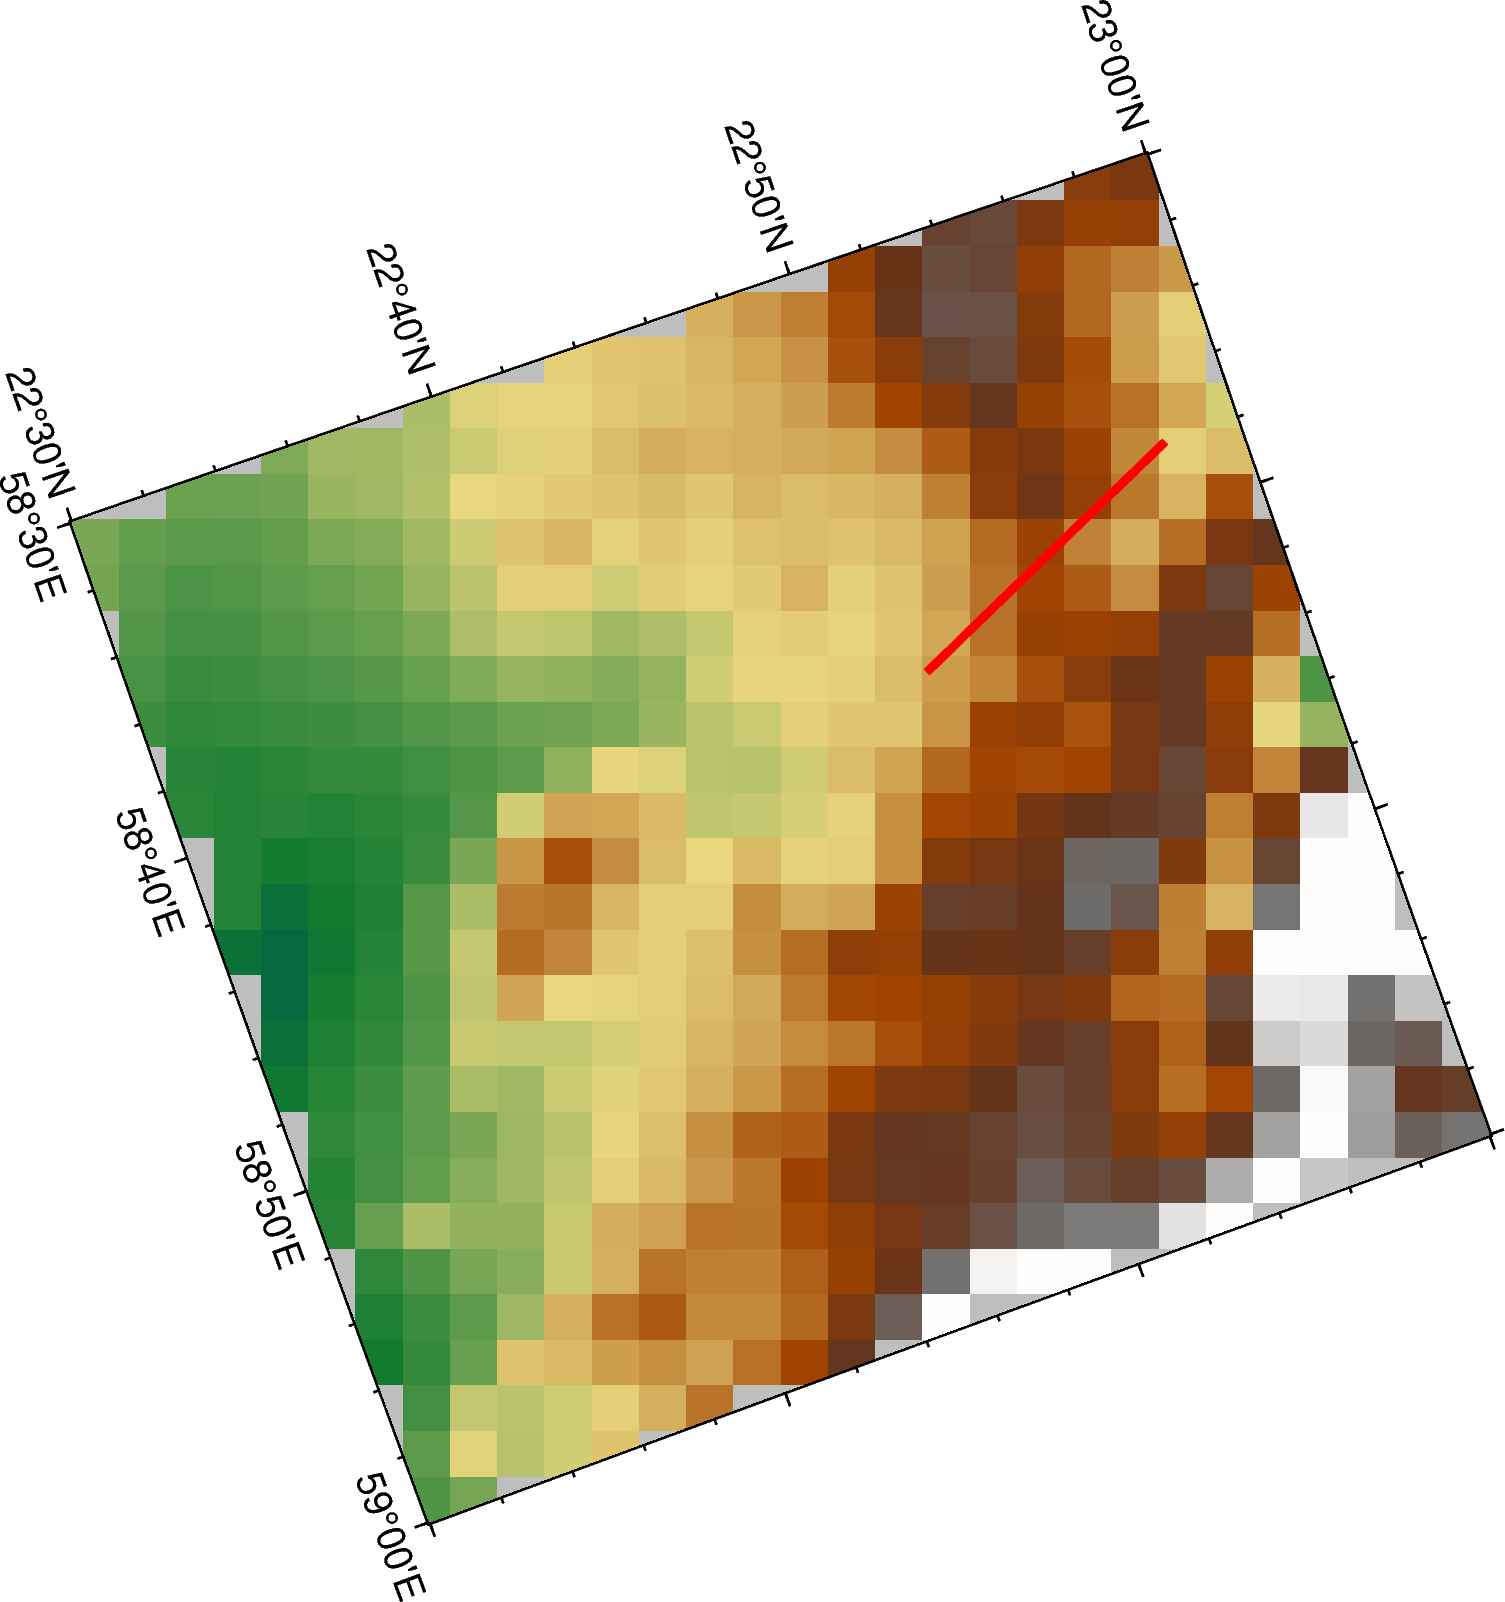

In [20]:
# import pygmt

# Set the region of the main figure
 # (22.8813°N, 58.7006°E).
# region = [137.5, 141, 34, 37]
region = [58.5, 59, 22.5, 23]

fig = pygmt.Figure()

# Plot the base map of the main figure. Universal Transverse Mercator (UTM)
# projection is used and the UTM zone is set to be '54S'.
fig.basemap(region=region, projection='U54S/12c'
            , frame=['WSne', 'af']
           )
fig.grdimage(grid='@earth_relief_01m',)
# # Coordinates of the fault line
fault_start = (58 + 38/60, 22 + 58/60)  # (lon, lat) for (58°38', 22°58')
fault_end = (58 + 42/60, 22 + 50/60)      # (lon, lat) for (58°42', 22°50')

# # Coordinates of the points
# point1 = (58 + 38/60, 22 + 58/60)  # Point BA1A
# point2 = (58 + 42/60, 22 + 50/60)  # Point BA1D

# # Create a figure
# fig = pygmt.Figure()

# # Create a basemap with a satellite image
# fig.grdimage(
#     grid='@earth_relief_01m',  # You can change this to a suitable satellite image or any grid
#     projection='M6i',
#     region=(58.63, 58.70, 22.80, 22.55),
#     frame=True,
#     # projection='M6i'
# )

# # Plot the fault line
fig.plot(
    x=[fault_start[0], fault_end[0]],  # x-coordinates (lon)
    y=[fault_start[1], fault_end[1]],  # y-coordinates (lat)
    pen='2p,red'
)
fig.show()

In [27]:
!pip install matplotlib geopandas contextily Pillow mapclassify seaborn imageio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.1 MB/s eta 0:00:00


<Axes: >

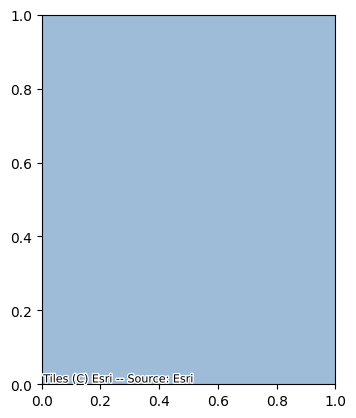

In [91]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Create two points in latitude and longitude coordinates
point1 = Point(-74.0060, 40.7128)  # New York City coordinates
point2 = Point(-118.2437, 34.0522)  # Los Angeles coordinates

# Create a line connecting the two points
line = LineString([point1, point2])

# Create a GeoDataFrame with the points and line
gdf = gpd.GeoDataFrame(geometry=[point1, point2, line], crs='EPSG:4326')
fig, ax = plt.subplots()
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldShadedRelief, crs=gdf.crs.to_string(),zoom=13)
gdf.plot(ax=ax)


In [93]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 6.9 MB/s eta 0:00:00


In [95]:
import folium

# Create a Folium map centered at a specific location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=4)  # Centered at San Francisco coordinates

# Add the two points to the map
folium.Marker(location=[40.7128, -74.0060], popup='New York City').add_to(m)  # New York City coordinates
folium.Marker(location=[34.0522, -118.2437], popup='Los Angeles').add_to(m)  # Los Angeles coordinates

# Add the line connecting the two points to the map
folium.PolyLine(locations=[[40.7128, -74.0060], [34.0522, -118.2437]], color='blue').add_to(m)
m

In [96]:
import folium

# Create a Folium map with a satellite image base layer
m = folium.Map(location=[37.7749, -122.4194], zoom_start=4, tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}')

# Add the two points to the map
folium.Marker(location=[40.7128, -74.0060], popup='New York City').add_to(m)  # New York City coordinates
folium.Marker(location=[34.0522, -118.2437], popup='Los Angeles').add_to(m)  # Los Angeles coordinates

# Add the line connecting the two points to the map
folium.PolyLine(locations=[[40.7128, -74.0060], [34.0522, -118.2437]], color='blue').add_to(m)

# Display the map
m

ValueError: Custom tiles must have an attribution.

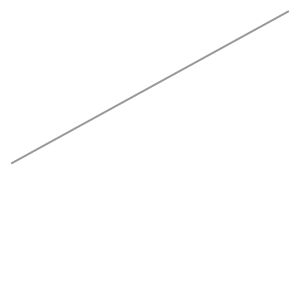

In [68]:
from shapely.geometry import Point, Polygon
Polygon(((625466, 5621289),(626082, 5621627),(625466, 5621289),(626082, 5621627)))


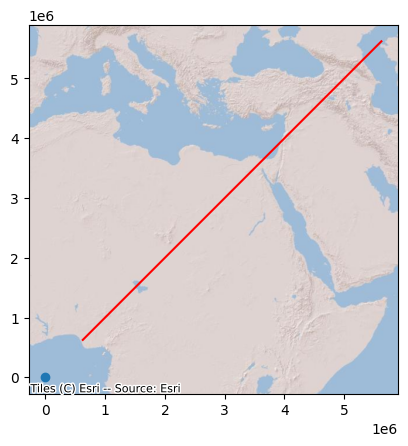

In [81]:
import contextily as ctx
import geopandas as gpd
import numpy as np

# gdf = gpd.GeoDataFrame()
# gdf['geometry'] = np.nan
# gdf.set_geometry('geometry')
# gdf.to_crs(epsg=3857)

 # (22.8813°N, 58.7006°E)

points = [
    Point(22.8813, 58.7006),
    # Point(626082, 5621627),
    # Point(627116, 5621680),
    # Point(625095, 5622358),
# Polygon(((625466, 5621289),(626082, 5621627),(625466, 5621289),(626082, 5621627)))
]
gdf = gpd.GeoDataFrame(['BA',], geometry=points, crs="EPSG:4326")

fig, ax = plt.subplots()


gdf.plot(ax=ax)
ax.plot((625466, 5621289),(626082, 5621627), color='red')
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldShadedRelief)

/Users/mnky9800n/anaconda3/envs/boreholes/lib/python3.11/site-packages/contextily/tile.py:623: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 13).
  warnings.warn(msg)


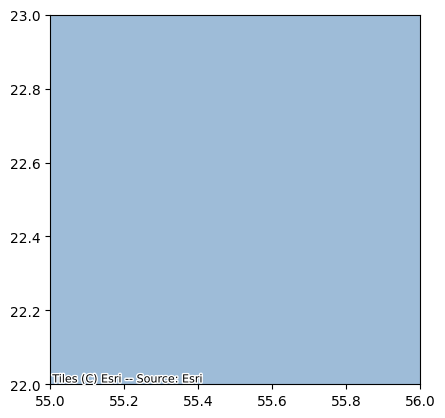

In [39]:
fig, ax = plt.subplots()

ax.set_ylim(22, 23)
ax.set_xlim(55, 56)

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldShadedRelief)

In [24]:
import contextily as ctx
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey'])


AttributeError: Stamen

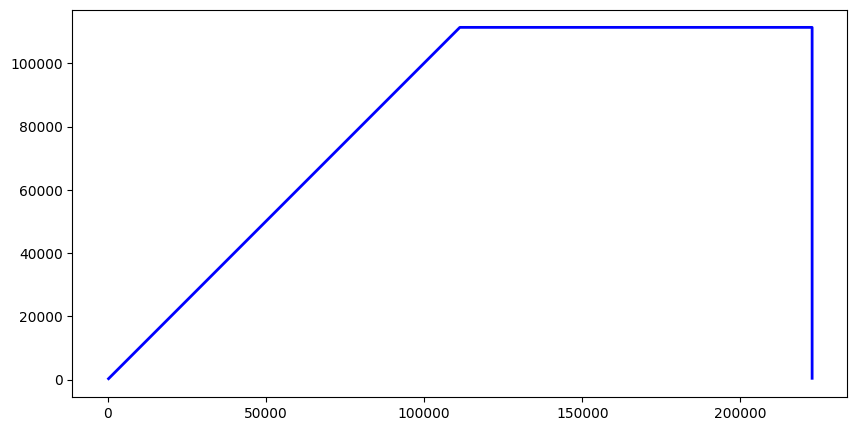

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import LineString

# Create a GeoDataFrame for the line
line_coords = [(0, 0), (1, 1), (2, 1), (2, 0)]  # Example coordinates for the line
line = LineString(line_coords)
gdf_line = gpd.GeoDataFrame(geometry=[line], crs='EPSG:4326')

# Create a base figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame line on the map
gdf_line.to_crs(epsg=3857).plot(ax=ax, color='blue', linewidth=2)

# Add a high-resolution satellite image
# ctx.add_basemap(ax, source=ctx.providers.Stamen.Terrain, zoom=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

# Set labels and title
plt.title('Map with a Line Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the figure as a PDF
plt.savefig('map_with_line.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
